<h1><center><span style = 'color:green'><b>THE SPARKS FOUNDATION<b></span></center></h1>

<h2><center>Data Science and Business Analytics Task</center></h2>

<h4 style='text-align: right;'>NAME: <span style = 'color:green'>SHUBHAM KUMAR</span><h4>

### **TASK1 - Prediction using Supervised Learning**

### **DATA AUDIT**

**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

**Displaying Raw Dataset**

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**First Five Row of the Dataset**

In [5]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Last Five Row of Dataset**

In [6]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


**Shape of the Dataset**

In [7]:
data.shape

(25, 2)

**Columns Present in a Database**

In [8]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

**Summary of the Dataset**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Checking Datatype**

In [12]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

**Checking Missing Values**

In [13]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

**No Missing Values**

### **Plotting**

**Plotting Scores by Hours**

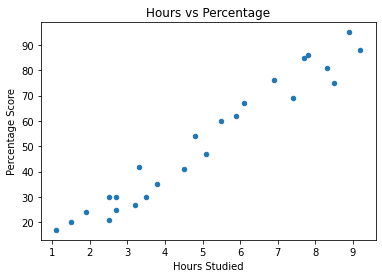

In [15]:
data.plot(x='Hours', y='Scores', kind="scatter")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

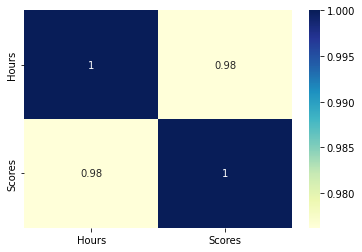

In [16]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [17]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **Linear Regression**

### **1. Predict the percentage of student based on number of study hours**

**Preparing the Data**

**Create X and Y**

In [18]:
X = data.iloc[:, :1].values #Until last Column
y = data.iloc[:, 1].values #last Column

**Splitting the data into training and testing sets**

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [21]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [22]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [23]:
from sklearn.linear_model import LinearRegression  
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

### **Visualization**

#### **Visualizing the training set result**

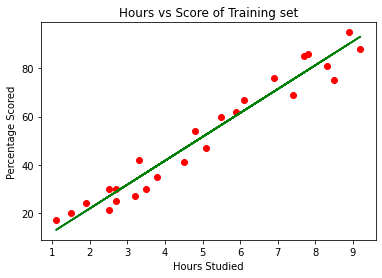

In [25]:
m = regression_model.coef_
c = regression_model.intercept_
regression_line = m * X + c
plt.plot(X, regression_line)
plt.scatter(X, y,c="red")
plt.plot(X_train, regression_model.predict(X_train), color="green")
plt.title("Hours vs Score of Training set")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

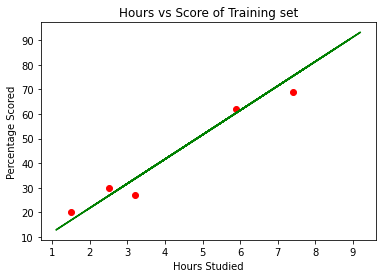

In [26]:
plt.scatter(X_test, y_test,c="red")
plt.plot(X_train, regression_model.predict(X_train), color="green")
plt.title("Hours vs Score of Training set")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

In [27]:
print(X_test)
y_pred=regression_model.predict(X_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [28]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## **2. What will be predicted score if a student studies for 9.25 hrs/day?**

In [29]:
hrs = 9.25
pred_score = regression_model.predict([[hrs]])
print("Number of hours: ", hrs)
print("Predicted score: ", pred_score[0])

Number of hours:  9.25
Predicted score:  93.69173248737535


#### **Result : If a student studies for 9.25hrs/day he can score 93.69173248737535 marks as predicted**

### **Evalute Regression Model**

In [30]:
X_addc = sm.add_constant(X)
result = sm.OLS(y, X_addc).fit()

**R Square - Square of the Corelation Cofficient**

In [31]:
print("R Square : ",result.rsquared)

R Square :  0.9529481969048356


**Adjacent R Square - Stastic based on the number of independent variables**

In [32]:
print("Adjacent R Square : ",result.rsquared_adj)

Adjacent R Square :  0.9509024663354806
